# SVM Classifier 

This classifier will help in predicting if the stock price will go up(predicts 1) or not(predicts 0)

# Experiment 1: Predicting stock price movement using market watch articles for APPL

In [5]:
import pandas as pd
#Reading apple market watch file into dataframe
mw_pkl = pd.read_pickle('processed_data/day_apl_mw.pkl')
mw_pkl_df=pd.DataFrame(mw_pkl)
mw_pkl_df.head()

,date,fulltext_sents,lemm_sents
0,2016-10-19,0.9433,0.96285
1,2016-10-25,0.7783,0.75060
2,2016-10-28,0.9937,0.98580
3,2016-10-31,0.9647,0.90940
4,2016-11-03,0.9942,0.98540


In [6]:
#Reading apple stock prices file into dataframe
stock_pkl = pd.read_pickle('processed_data/day_a_stock_closelabel.pkl')
stock_pkl_df=pd.DataFrame(stock_pkl)
stock_pkl_df.head()

,date,open,close,NextClose,Label
0,2015-12-01,118.126000,118.020633,117.126244,0
1,2015-12-02,117.190625,117.126244,115.999981,0
2,2015-12-03,116.072000,115.999981,117.537031,1
3,2015-12-04,117.310000,117.537031,119.050000,1
4,2015-12-05,119.050000,119.050000,118.674867,0


In [7]:
#setting date as index for both dfs
mw_pkl_df = mw_pkl_df.set_index("date")
stock_pkl_df = stock_pkl_df.set_index("date")

In [8]:
#merge dfs on indexes
merge1=stock_pkl_df.merge(mw_pkl_df,how='inner',left_index=True,right_index=True)

In [9]:
merge1.head()

,open,close,NextClose,Label,fulltext_sents,lemm_sents
date,,,,,,
2016-10-19,117.295619,117.280281,117.039667,0,0.9433,0.96285
2016-10-25,117.430244,117.239794,114.988125,0,0.7783,0.75060
2016-10-28,114.728444,114.704431,113.675256,0,0.9937,0.98580
2016-10-31,113.715194,113.675256,112.158214,0,0.9647,0.90940
2016-11-03,110.402925,110.345731,109.306719,0,0.9942,0.98540


In [11]:
model_df=merge1[['open','close','NextClose','fulltext_sents','Label']] #leaving out lemmatized sentiment values

In [12]:
model_df

,open,close,NextClose,fulltext_sents,Label
date,,,,,
2016-10-19,117.295619,117.280281,117.039667,0.943300,0
2016-10-25,117.430244,117.239794,114.988125,0.778300,0
2016-10-28,114.728444,114.704431,113.675256,0.993700,0
2016-10-31,113.715194,113.675256,112.158214,0.964700,0
2016-11-03,110.402925,110.345731,109.306719,0.994200,0
...,...,...,...,...,...
2022-02-14,167.892667,167.973000,171.489119,0.432367,1
2022-02-15,171.308750,171.489119,171.880944,0.946000,1
2022-02-16,171.949138,171.880944,170.643169,0.754800,0


Splitting data into feature matrix and target column (X and y)

In [14]:
import numpy as np
X=model_df
#drop label since it is the target value
X=np.array(X.drop(['Label'],1))

y=np.array(model_df['Label'])

/Users/keerthiseetha/villanova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


Setting split to 70:30 train:test


In [17]:
split_value=int(0.7*len(model_df))

In [18]:
X_train = X[0:split_value]
y_train = y[0:split_value]

X_test = X[split_value:]
y_test = y[split_value:]

Check the sizes of the df to confirm split

In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,model_df.shape

((368, 4), (158, 4), (368,), (158,), (526, 5))

Feature Scaling to make sure that the feature values are all on one scale of having a mean of 0 and variance of 1

In [22]:
from sklearn.preprocessing import scale
X_train=scale(X_train)
X_test=scale(X_test)

# SVM Classifier

In [23]:
from sklearn.svm import SVC
model=SVC().fit(X_train,y_train)
pred=model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix
accuracy_score(y_test, pred)

0.5759493670886076

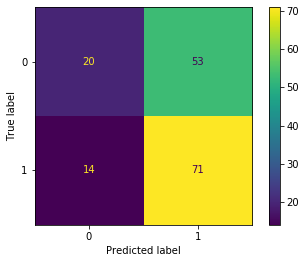

In [44]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [114]:
print(classification_report(pred,y_test,target_names=['PriceDecrease','PriceIncreaseOrStay']))

                     precision    recall  f1-score   support

      PriceDecrease       0.27      0.59      0.37        34
PriceIncreaseOrStay       0.84      0.57      0.68       124

           accuracy                           0.58       158
          macro avg       0.55      0.58      0.53       158
       weighted avg       0.71      0.58      0.61       158



# Exp 2: Predicting stock price movement using Motley Fool articles for APPL

In [34]:
mf_pkl = pd.read_pickle('processed_data/day_apl_mf.pkl')
mf_pkl_df=pd.DataFrame(mf_pkl)

In [35]:
mf_pkl_df = mf_pkl_df.set_index("date")

In [36]:
merge2=stock_pkl_df.merge(mf_pkl_df,how='inner',left_index=True,right_index=True)

In [37]:
merge2

,open,close,NextClose,Label,fulltext_sents,lemm_sents
date,,,,,,
2018-07-23,191.086429,191.173957,192.678750,1,0.99670,0.998100
2018-07-25,193.375714,193.338214,194.304062,1,0.95575,0.955200
2018-07-30,190.402500,190.373488,192.200537,1,0.49945,0.499000
2018-07-31,191.716875,192.200537,199.803475,1,0.99960,0.999400
2018-08-01,199.436625,199.803475,204.729806,1,0.71965,0.721317
...,...,...,...,...,...,...
2022-02-12,168.360000,168.200000,167.973000,0,0.99870,0.999000
2022-02-14,167.892667,167.973000,171.489119,1,0.49960,0.499400
2022-02-15,171.308750,171.489119,171.880944,1,0.00545,0.005400


In [38]:
X_mf=merge2
#drop label since it is the target value
X_mf=np.array(X_mf.drop(['Label'],1))

y_mf=np.array(merge2['Label'])

/Users/keerthiseetha/villanova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
Xmf_train = X_mf[0:split_value]
ymf_train = y_mf[0:split_value]

Xmf_test = X_mf[split_value:]
ymf_test = y_mf[split_value:]

In [40]:
Xmf_train=scale(Xmf_train)
Xmf_test=scale(Xmf_test)

In [42]:
mf_model=SVC().fit(Xmf_train,ymf_train)
mfpred=mf_model.predict(Xmf_test)

In [43]:
accuracy_score(ymf_test, mfpred)

0.534521158129176

In [115]:
print(classification_report(mfpred,ymf_test,target_names=['PriceDecrease','PriceIncreaseOrStay']))

                     precision    recall  f1-score   support

      PriceDecrease       0.00      0.00      0.00         0
PriceIncreaseOrStay       1.00      0.53      0.70       449

           accuracy                           0.53       449
          macro avg       0.50      0.27      0.35       449
       weighted avg       1.00      0.53      0.70       449



/Users/keerthiseetha/villanova/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Exp 3 : Combining Motley Fool and Market Watch sentiments

In [48]:
mf_mw_df=model_df.join(mf_pkl_df,how='outer',lsuffix="_mw",rsuffix="_mf") 

In [49]:
mf_mw_df.head()

,open,close,NextClose,fulltext_sents_mw,Label,fulltext_sents_mf,lemm_sents
date,,,,,,,
2016-01-18,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2016-10-19,117.295619,117.280281,117.039667,0.9433,0.0,NaN,NaN
2016-10-25,117.430244,117.239794,114.988125,0.7783,0.0,NaN,NaN
2016-10-28,114.728444,114.704431,113.675256,0.9937,0.0,NaN,NaN
2016-10-31,113.715194,113.675256,112.158214,0.9647,0.0,NaN,NaN


In [50]:
mf_mw_df.shape

(1200, 7)

In [54]:
mf_mw_df.isna().sum()

open                 674
close                674
NextClose            674
fulltext_sents_mw    674
Label                674
fulltext_sents_mf    174
lemm_sents           174
dtype: int64

In [99]:
c1_mw_mf=mf_mw_df.dropna(subset=['Label'])

In [100]:
c1_mw_mf.shape,c1_mw_mf.isna().sum(),c1_mw_mf.head()

((526, 7),
 open                   0
 close                  0
 NextClose              0
 fulltext_sents_mw      0
 Label                  0
 fulltext_sents_mf    174
 lemm_sents           174
 dtype: int64,
                   open       close   NextClose  fulltext_sents_mw  Label  \
 date                                                                       
 2016-10-19  117.295619  117.280281  117.039667             0.9433    0.0   
 2016-10-25  117.430244  117.239794  114.988125             0.7783    0.0   
 2016-10-28  114.728444  114.704431  113.675256             0.9937    0.0   
 2016-10-31  113.715194  113.675256  112.158214             0.9647    0.0   
 2016-11-03  110.402925  110.345731  109.306719             0.9942    0.0   
 
             fulltext_sents_mf  lemm_sents  
 date                                       
 2016-10-19                NaN         NaN  
 2016-10-25                NaN         NaN  
 2016-10-28                NaN         NaN  
 2016-10-31               

In [101]:
#Calculating average sentiments between MF and MW for each day
c1_mw_mf['new_sent']=c1_mw_mf.iloc[:,[3,5,6]].mean(axis=1)

# df['mean'] = df.iloc[:, [0,1,2,3,4].mean(axis=1)
# Ref:https://stackoverflow.com/questions/33750326/compute-row-average-in-pandas

/Users/keerthiseetha/villanova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
c1_mw_mf.head()

,open,close,NextClose,fulltext_sents_mw,Label,fulltext_sents_mf,lemm_sents,new_sent
date,,,,,,,,
2016-10-19,117.295619,117.280281,117.039667,0.9433,0.0,NaN,NaN,0.9433
2016-10-25,117.430244,117.239794,114.988125,0.7783,0.0,NaN,NaN,0.7783
2016-10-28,114.728444,114.704431,113.675256,0.9937,0.0,NaN,NaN,0.9937
2016-10-31,113.715194,113.675256,112.158214,0.9647,0.0,NaN,NaN,0.9647
2016-11-03,110.402925,110.345731,109.306719,0.9942,0.0,NaN,NaN,0.9942


In [105]:
c1_mw_mf.shape

(526, 8)

In [108]:
X_1=c1_mw_mf
X_1=np.array(X_1.drop(['Label','fulltext_sents_mw','fulltext_sents_mf','lemm_sents'],1)) #dropping sents since they have Na's

y_1=np.array(c1_mw_mf['Label'])

X_1.shape,y_1.shape

/Users/keerthiseetha/villanova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


((526, 4), (526,))

In [109]:
X1_train = X_1[0:split_value]
y1_train = y_1[0:split_value]

X1_test = X_1[split_value:]
y1_test = y_1[split_value:]

X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape

((368, 4), (158, 4), (368,), (158,))

In [110]:
#standardizing
X1_train=scale(X1_train)
X1_test=scale(X1_test)

In [111]:
model_1=SVC().fit(X1_train,y1_train)
pred_1=model_1.predict(X1_test)

In [112]:
accuracy_score(y1_test, pred_1)

0.5443037974683544

In [116]:
print(classification_report(pred_1,y1_test,target_names=['PriceDecrease','PriceIncreaseorStay']))

                     precision    recall  f1-score   support

      PriceDecrease       0.03      0.67      0.05         3
PriceIncreaseorStay       0.99      0.54      0.70       155

           accuracy                           0.54       158
          macro avg       0.51      0.60      0.38       158
       weighted avg       0.97      0.54      0.69       158



# Exp 4: Predicting stock movement using tweets related to APPL

In [26]:
import pandas as pd
tw_sent=pd.read_pickle('processed_data/day_apl_tw_sent.pkl')

In [27]:
#Reading apple stock prices file into dataframe
stock_pkl = pd.read_pickle('processed_data/day_a_stock_closelabel.pkl')
stock_pkl_df=pd.DataFrame(stock_pkl)
stock_pkl_df.head()

,date,open,close,NextClose,Label
0,2015-12-01,118.126000,118.020633,117.126244,0
1,2015-12-02,117.190625,117.126244,115.999981,0
2,2015-12-03,116.072000,115.999981,117.537031,1
3,2015-12-04,117.310000,117.537031,119.050000,1
4,2015-12-05,119.050000,119.050000,118.674867,0


In [28]:
tw_sent.head()

,date,SentimentScore
0,2017-01-01,0.109612
1,2017-01-02,0.118147
2,2017-01-03,0.097646
3,2017-01-04,0.088151
4,2017-01-05,0.084029


In [29]:
stock_pkl_df.columns,tw_sent.columns

(Index(['date', 'open', 'close', 'NextClose', 'Label'], dtype='object'),
 Index(['date', 'SentimentScore'], dtype='object'))

In [33]:
stock_pkl_df.dtypes,tw_sent.dtypes

(date          object
 open         float64
 close        float64
 NextClose    float64
 Label          int64
 dtype: object,
 date              datetime64[ns]
 SentimentScore           float64
 dtype: object)

In [37]:
#convert date in stock df to dateformat
stock_pkl_df['date'] = pd.to_datetime(stock_pkl_df['date'])

In [38]:
stock_pkl_df.dtypes,tw_sent.dtypes

(date         datetime64[ns]
 open                float64
 close               float64
 NextClose           float64
 Label                 int64
 dtype: object,
 date              datetime64[ns]
 SentimentScore           float64
 dtype: object)

In [39]:
tw_stock=stock_pkl_df.merge(tw_sent,how='inner')

In [41]:
tw_stock.shape,tw_stock.isna().sum()

((1431, 6),
 date              0
 open              0
 close             0
 NextClose         1
 Label             0
 SentimentScore    0
 dtype: int64)

In [42]:
tw_stock=tw_stock.dropna(subset=['NextClose'])

In [61]:
tw_stock.set_index('date',inplace=True)

In [62]:
tw_stock.shape,tw_stock.isna().sum()

((1430, 5),
 open              0
 close             0
 NextClose         0
 Label             0
 SentimentScore    0
 dtype: int64)

In [63]:
tw_stock.head(),tw_stock.tail()

(                  open       close   NextClose  Label  SentimentScore
 date                                                                 
 2017-01-03  115.834667  115.834380  116.075720      1        0.097646
 2017-01-04  116.080000  116.075720  116.404615      1        0.088151
 2017-01-05  116.358146  116.404615  117.509957      1        0.084029
 2017-01-06  117.415657  117.509957  117.840000      1        0.051908
 2017-01-07  117.890000  117.840000  118.656853      1        0.083957,
                   open       close   NextClose  Label  SentimentScore
 date                                                                 
 2022-04-01  173.974375  173.870125  176.872281      1        0.129811
 2022-04-04  176.612800  176.872281  176.380313      0        0.120449
 2022-04-05  176.601250  176.380313  172.062187      0        0.123829
 2022-04-06  172.328519  172.062187  171.876406      0        0.111728
 2022-04-07  171.847506  171.876406  170.994781      0        0.107512)

In [64]:
import numpy as np
Xtw=tw_stock
Xtw=np.array(Xtw.drop(['Label'],1))
ytw=np.array(tw_stock['Label'])
Xtw.shape,ytw.shape

/Users/keerthiseetha/villanova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


((1430, 4), (1430,))

In [65]:
split_value=int(0.7*len(tw_stock))
Xtw_train = Xtw[0:split_value]
ytw_train = ytw[0:split_value]

Xtw_test = Xtw[split_value:]
ytw_test = ytw[split_value:]

Xtw_train.shape,Xtw_test.shape,ytw_train.shape,ytw_test.shape

((1000, 4), (430, 4), (1000,), (430,))

In [66]:
#standardizing
from sklearn.preprocessing import scale
Xtw_train=scale(Xtw_train)
Xtw_test=scale(Xtw_test)

In [67]:
from sklearn.svm import SVC
tw_model=SVC().fit(Xtw_train,ytw_train)
pred_tw=tw_model.predict(Xtw_test)

In [68]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix

In [72]:
from sklearn.metrics import classification_report
print(classification_report(pred_tw,ytw_test,target_names=['PriceDecrease','PriceIncreaseorStay']))

                     precision    recall  f1-score   support

      PriceDecrease       0.04      0.80      0.08        10
PriceIncreaseorStay       0.99      0.54      0.70       420

           accuracy                           0.54       430
          macro avg       0.52      0.67      0.39       430
       weighted avg       0.97      0.54      0.68       430



In [70]:
accuracy_score(ytw_test,pred_tw)

0.541860465116279

# Exp 5 : Create a new predictor variable for twitter to use for prediction

In [74]:
tw_stock.shape

(1430, 5)

In [75]:
#new variable showing if the price decresed or not in a day
tw_stock['C-O']=tw_stock.apply(lambda x: 1 if (x['close']>= x['open']) else 0, axis =1)

In [76]:
tw_stock.head()

,open,close,NextClose,Label,SentimentScore,C-O
date,,,,,,
2017-01-03,115.834667,115.834380,116.075720,1,0.097646,0
2017-01-04,116.080000,116.075720,116.404615,1,0.088151,0
2017-01-05,116.358146,116.404615,117.509957,1,0.084029,1
2017-01-06,117.415657,117.509957,117.840000,1,0.051908,1
2017-01-07,117.890000,117.840000,118.656853,1,0.083957,0


In [77]:
Xtw=tw_stock
Xtw=np.array(Xtw.drop(['Label'],1))
ytw=np.array(tw_stock['Label'])
Xtw.shape,ytw.shape

/Users/keerthiseetha/villanova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


((1430, 5), (1430,))

In [78]:
split_value=int(0.7*len(tw_stock))
Xtw_train = Xtw[0:split_value]
ytw_train = ytw[0:split_value]

Xtw_test = Xtw[split_value:]
ytw_test = ytw[split_value:]

Xtw_train.shape,Xtw_test.shape,ytw_train.shape,ytw_test.shape

((1000, 5), (430, 5), (1000,), (430,))

In [79]:
Xtw_train=scale(Xtw_train)
Xtw_test=scale(Xtw_test)

In [80]:
tw_model=SVC().fit(Xtw_train,ytw_train)
pred_tw=tw_model.predict(Xtw_test)

In [81]:
print(classification_report(pred_tw,ytw_test,target_names=['PriceDecrease','PriceIncreaseorStay']))

                     precision    recall  f1-score   support

      PriceDecrease       0.67      0.64      0.65       214
PriceIncreaseorStay       0.66      0.69      0.67       216

           accuracy                           0.66       430
          macro avg       0.66      0.66      0.66       430
       weighted avg       0.66      0.66      0.66       430



In [82]:
accuracy_score(ytw_test,pred_tw)

0.6627906976744186

In [94]:
#dumping df containing stock prices along with tweet sentiments into files
tw_stock.to_pickle("processed_data/a_tw_stock.pkl")
tw_stock.to_pickle("processed_data/a_tw_stock.csv")

# Gradient Boosting Classifier using twitter

In [4]:
import pandas as pd
tw_pkl = pd.read_pickle('processed_data/a_tw_stock.pkl')
tw_stock=pd.DataFrame(tw_pkl)

In [8]:
import numpy as np
from sklearn.preprocessing import scale
Xtw=tw_stock
Xtw=np.array(Xtw.drop(['Label'],1))
ytw=np.array(tw_stock['Label'])
Xtw.shape,ytw.shape

split_value=int(0.7*len(tw_stock))
Xtw_train = Xtw[0:split_value]
ytw_train = ytw[0:split_value]

Xtw_test = Xtw[split_value:]
ytw_test = ytw[split_value:]

Xtw_train.shape,Xtw_test.shape,ytw_train.shape,ytw_test.shape

Xtw_train=scale(Xtw_train)
Xtw_test=scale(Xtw_test)

/Users/keerthiseetha/villanova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.01,0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(n_estimators=20,
                                      learning_rate=learning_rate,
                                      max_features=2,
                                      max_depth=3,
                                      random_state=0)
    model.fit(Xtw_train,ytw_train.ravel())
    print("LR: ", learning_rate)
    
    # Scoring the model
    print("Accuracy on train: {0:.5f}".format(
        model.score(Xtw_train, ytw_train.ravel())))
    print("Accuracy on train: {0:.5f}".format(
        model.score(Xtw_test, ytw_test.ravel())))
    print()

LR:  0.01
Accuracy on train: 0.58900
Accuracy on train: 0.52791

LR:  0.05
Accuracy on train: 0.70800
Accuracy on train: 0.57209

LR:  0.1
Accuracy on train: 0.75000
Accuracy on train: 0.66977

LR:  0.25
Accuracy on train: 0.77900
Accuracy on train: 0.67907

LR:  0.5
Accuracy on train: 0.83900
Accuracy on train: 0.72791

LR:  0.75
Accuracy on train: 0.87500
Accuracy on train: 0.72326

LR:  1
Accuracy on train: 0.87400
Accuracy on train: 0.74884



Learning Rate of 1 bought the best accuracy on test

In [11]:
gd_class=GradientBoostingClassifier(n_estimators=20,
                                      learning_rate=1,
                                      max_features=2,
                                      max_depth=3,
                                      random_state=0)
gd_class.fit(Xtw_train,ytw_train.ravel())
pred = gd_class.predict(Xtw_test)
# pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

acc_score = accuracy_score(ytw_test, pred)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.7488372093023256


In [12]:
print(classification_report(ytw_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       203
           1       0.74      0.81      0.77       227

    accuracy                           0.75       430
   macro avg       0.75      0.74      0.75       430
weighted avg       0.75      0.75      0.75       430



In [14]:
cm = confusion_matrix(ytw_test, pred)
cm_df = pd.DataFrame(
    cm, index=["true 0", "true 1"],
    columns=["pred 0", "pred 1"]
)

display(cm_df)

,pred 0,pred 1
true 0,137,66
true 1,42,185


# Random Forest Classifier using twitter

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(n_estimators=100, random_state=2311502)
rf_class.fit(Xtw_train, ytw_train.ravel())  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2311502,
                       verbose=0, warm_start=False)

In [18]:

rf_pred = rf_class.predict(Xtw_test)

print(" Accuracy : ",accuracy_score(ytw_test, rf_pred))


 Accuracy :  0.7209302325581395


In [19]:
print(classification_report(ytw_test, rf_pred))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       203
           1       0.71      0.79      0.75       227

    accuracy                           0.72       430
   macro avg       0.72      0.72      0.72       430
weighted avg       0.72      0.72      0.72       430



In [20]:
cm = confusion_matrix(ytw_test, rf_pred)
cm_df = pd.DataFrame(
    cm, index=["true 0", "true 1"],
    columns=["pred 0", "pred 1"]
)

display(cm_df)

,pred 0,pred 1
true 0,130,73
true 1,47,180


In [57]:
# mw_pkl_df.shape,mf_pkl_df.shape

((603, 2), (1026, 2))

In [59]:
# result=mw_pkl_df.append(mf_pkl_df) #appeninf MF and MW sentiments dfs

In [61]:
# result.shape,result.head()

((1629, 2),
             fulltext_sents  lemm_sents
 date                                  
 2016-10-19          0.9433     0.96285
 2016-10-25          0.7783     0.75060
 2016-10-28          0.9937     0.98580
 2016-10-31          0.9647     0.90940
 2016-11-03          0.9942     0.98540)

In [62]:
#getting the sentiments average per day
# full_sent = result.groupby('date')['fulltext_sents'].mean().reset_index()
# lemm_sent=result.groupby('date')['lemm_sents'].mean().reset_index()

In [64]:
# full_sent.head(),lemm_sent.head(),full_sent.shape,lemm_sent.shape

(         date  fulltext_sents
 0  2016-01-18          0.0000
 1  2016-10-19          0.9433
 2  2016-10-25          0.7783
 3  2016-10-28          0.9937
 4  2016-10-31          0.9647,
          date  lemm_sents
 0  2016-01-18     0.00000
 1  2016-10-19     0.96285
 2  2016-10-25     0.75060
 3  2016-10-28     0.98580
 4  2016-10-31     0.90940,
 (1238, 2),
 (1238, 2))

In [71]:
# new_sentiments = pd.merge(full_sent, lemm_sent, how='inner')

In [72]:
# new_sentiments.shape,new_sentiments.head()

((1238, 3),
          date  fulltext_sents  lemm_sents
 0  2016-01-18          0.0000     0.00000
 1  2016-10-19          0.9433     0.96285
 2  2016-10-25          0.7783     0.75060
 3  2016-10-28          0.9937     0.98580
 4  2016-10-31          0.9647     0.90940)

In [73]:
# new_sentiments.set_index('date')

,fulltext_sents,lemm_sents
date,,
2016-01-18,0.000000,0.000000
2016-10-19,0.943300,0.962850
2016-10-25,0.778300,0.750600
2016-10-28,0.993700,0.985800
2016-10-31,0.964700,0.909400
...,...,...
2022-02-15,0.475725,0.479900
2022-02-16,0.754800,0.739967
2022-02-17,0.903325,0.833538


In [91]:
# stock_pkl_df.shape

(1727, 4)

In [93]:
# news_stock=stock_pkl_df.merge(new_sentiments,how='inner',left_index=True,right_index=True)

In [94]:
# news_stock.shape

(0, 7)

In [92]:
# news_stock.isna().sum()

open                 0
close                0
NextClose            1
Label                0
date              1727
fulltext_sents    1727
lemm_sents        1727
dtype: int64

In [84]:
# X_1=news_stock
# X_1=np.array(X_1.drop(['Label'],1))

# y_1=np.array(news_stock['Label'])

# X_1.shape,y_1.shape

/Users/keerthiseetha/villanova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


((0, 6), (0,))

In [ ]:
# X1_train = X_1[0:split_value]
# y1_train = y_1[0:split_value]

# X1_test = X_1[split_value:]
# y1_test = y_1[split_value:]


In [ ]:

# X1_train=scale(X1_train)
# X1_test=scale(X1_test)

In [82]:




# model_1=SVC().fit(X1_train,y1_train)
# pred_1=model_1.predict(X1_test)

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required.